# Interpolation 

In [3]:
%matplotlib inline 
%run mplimp.py

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [5]:
x = [0, 1, 2]
y = [1, 3, 2]

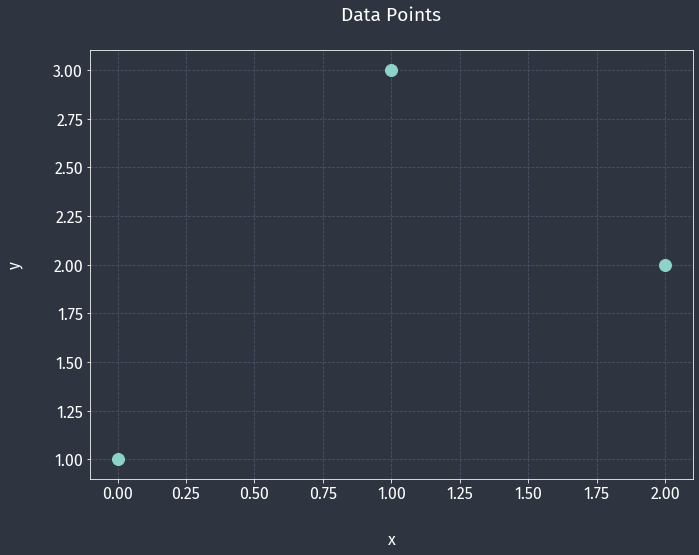

In [6]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'o', markersize=12)
plt.grid()
plt.title('Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

2.5


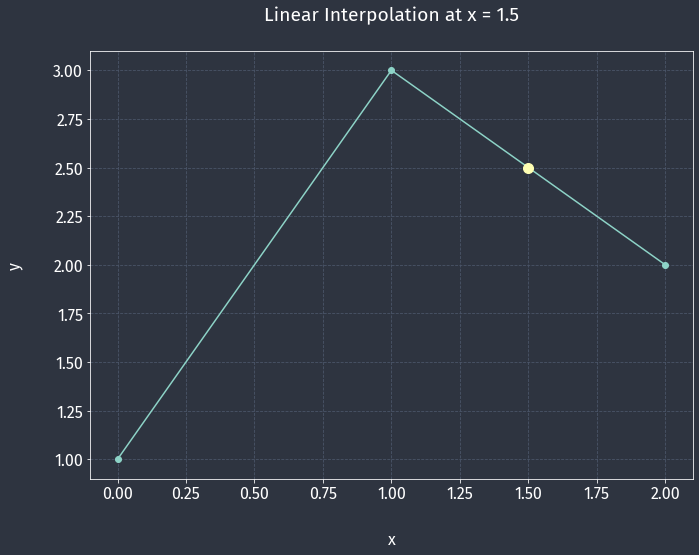

In [8]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-o')
plt.plot(1.5, y_hat, 'o', markersize=10)
plt.title('Linear Interpolation at x = 1.5')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
from scipy.interpolate import CubicSpline

In [10]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

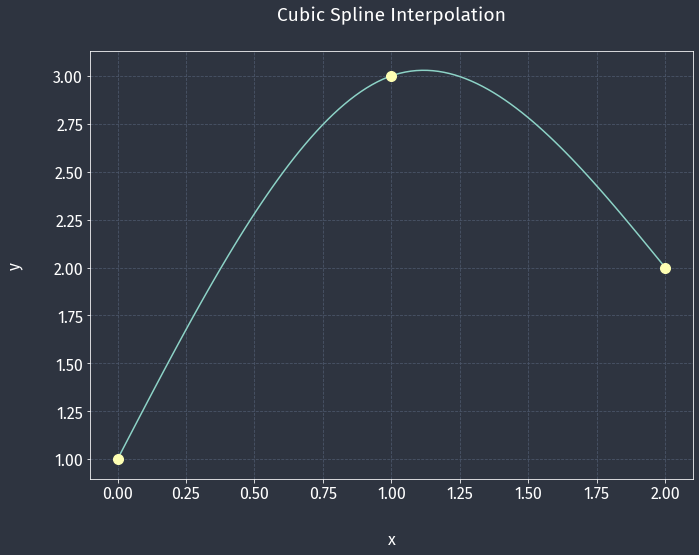

In [11]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new)
plt.plot(x, y, 'o', markersize=10)
plt.title('Cubic Spline Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
f(1.5)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new)
plt.plot(x, y, 'o')
plt.plot(1.5, f(1.5), 'o', markersize=10)
# plt.plot(1.5, y_hat, 'x', markersize=10)    # linear interpolation
plt.title('Cubic Spline Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f2 = CubicSpline(x, y)
x_new2 = np.linspace(0, 2, 100)
y_new2 = f2(x_new)

In [ ]:
help(CubicSpline)

In [ ]:
f2(1.5)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x_new2, y_new2)
plt.plot(x, y, 'o')
plt.plot(1.5, f2(1.5), 'o', markersize=10)

plt.plot(x_new, y_new, '--', color='gray')
plt.plot(1.5, f(1.5), 'x', markersize=8)
plt.plot(1.5, y_hat, 'x', markersize=8)    # linear interpolation

plt.title('Cubic Spline (Not a Knot) Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Which is the "correct" answer?! 

# Methods of interpolation 

See notes ... 

# Newton's Method 

In [1]:
%matplotlib inline 
%run mplimp.py

In [2]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [13]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [14]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

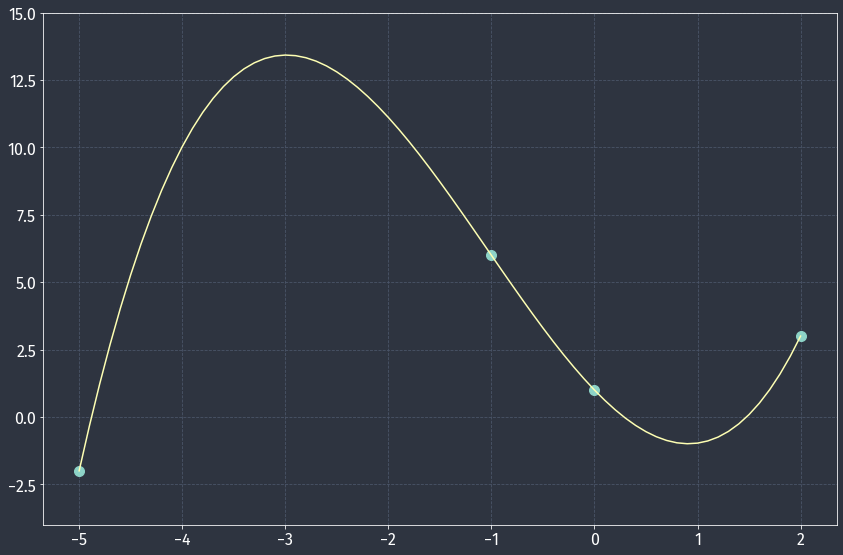

In [17]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'o', markersize=10)
plt.plot(x_new, y_new)
plt.grid()
_ = plt.ylim((-4, 15))

In [18]:
from scipy.interpolate import CubicSpline

In [25]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

x_new = np.arange(-5, 2.1, .1)


a_s = divided_diff(x, y)[0, :]
y_new = newton_poly(a_s, x, x_new)

cub = CubicSpline(x, y, bc_type='natural')
y_cub = cub(x_new)

In [26]:
x_test = -3
y_t_n = newton_poly(a_s, x, x_test)
y_t_c = cub(x_test)
print("Newton's interp:", y_t_n)
print("Cubic spline:   ", y_t_c)

Newton's interp: 13.428571428571427
Cubic spline:    6.881355932203391


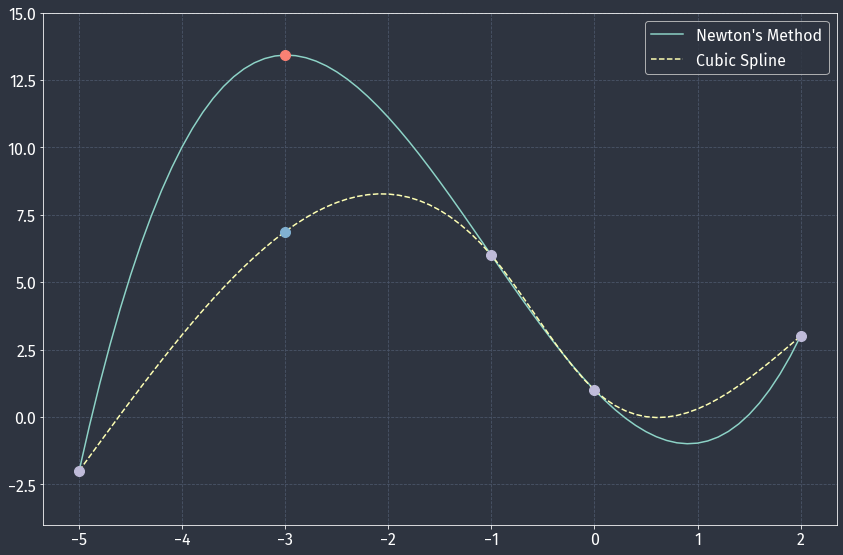

In [27]:
# evaluate on new data points
plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new)
plt.plot(x_new, y_cub, '--')

plt.plot(x, y, 'o', markersize=10)

plt.plot(x_test, y_t_n, 'o', markersize=10)
plt.plot(x_test, y_t_c, 'o', markersize=10)

plt.ylim((-4, 15))
plt.grid()
_ = plt.legend(["Newton's Method", "Cubic Spline"])